In [2]:
from kfold_and_metrics import *

import numpy as np
import pandas as pd

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
tf.keras.backend.clear_session()

from sklearn.metrics import confusion_matrix
import scipy.stats as ss

In [3]:
df = pd.read_csv("final.csv")
df = df.drop(columns=["id"])
df.head()

,patient_id,diagnostics_Image-original_Mean,diagnostics_Mask-original_VoxelNum,diagnostics_Mask-original_VolumeNum,diagnostics_Image-interpolated_Mean,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_VoxelNum,diagnostics_Mask-interpolated_VolumeNum,diagnostics_Mask-interpolated_Maximum,...,diagnostics_Mask-interpolated_BoundingBox_2,diagnostics_Mask-interpolated_BoundingBox_3,diagnostics_Mask-interpolated_BoundingBox_4,diagnostics_Mask-interpolated_BoundingBox_5,diagnostics_Mask-interpolated_CenterOfMassIndex_0,diagnostics_Mask-interpolated_CenterOfMassIndex_1,diagnostics_Mask-interpolated_CenterOfMassIndex_2,diagnostics_Mask-interpolated_CenterOfMass_0,diagnostics_Mask-interpolated_CenterOfMass_1,diagnostics_Mask-interpolated_CenterOfMass_2
0,LIDC-IDRI-0001,-826.943929,5905,1,-417.494203,-990.291016,1038.270874,909,2,237.087921,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
1,LIDC-IDRI-0001,-826.943929,4613,1,-405.581777,-982.456726,949.768005,699,1,221.953705,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
2,LIDC-IDRI-0001,-826.943929,4955,1,-410.236759,-990.291016,1038.270874,772,1,237.087921,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
3,LIDC-IDRI-0001,-826.943929,5498,1,-416.576321,-990.291016,1038.270874,841,2,237.087921,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362
4,LIDC-IDRI-0002,-826.943929,10351,1,-546.359139,-1007.657349,1020.174988,749,1,160.687653,...,0.0,13.0,11.0,10.0,17.041265,16.108666,4.184319,128.652843,34.787644,-229.881362


,metric,mean,std
0,f1_score,0.345804,0.075910
1,accuracy_score,0.669345,0.058343
2,roc_auc_score,0.573651,0.039642


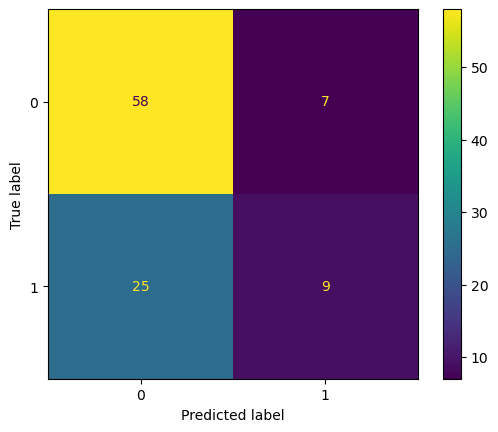

In [4]:
rf_params = {'n_estimators': 100, 'max_depth': 25, 'min_samples_leaf': 25, 'criterion': "gini"}

rf = RandomForestClassifier(**rf_params)
rf_scores = k_fold_cv(model=rf, df=df, pca_components=50, show_confusion_matrix=True)
rf_metrics = mean_std_results_k_fold_CV(rf_scores)
rf_metrics

,metric,mean,std
0,f1_score,0.410515,0.066938
1,accuracy_score,0.629348,0.039643
2,roc_auc_score,0.571662,0.032439


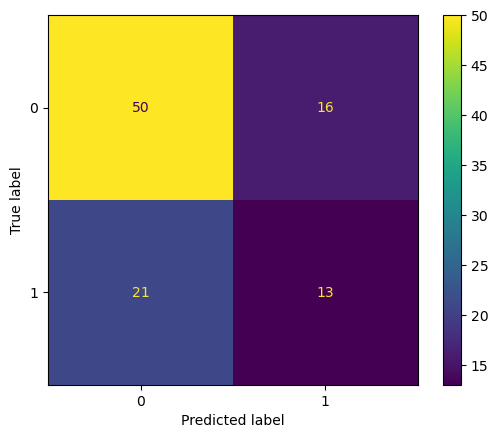

In [7]:
xgb_params = {'n_estimators': 100, 'max_depth': 5, 'min_child_weight': 5}

xgb = XGBClassifier(**xgb_params)
xgb_scores = k_fold_cv(xgb, df, pca_components=50, show_confusion_matrix=True)
xgb_metrics = mean_std_results_k_fold_CV(xgb_scores)
xgb_metrics

,metric,mean,std
0,f1_score,0.521836,0.098511
1,accuracy_score,0.705552,0.045832
2,roc_auc_score,0.647724,0.050386


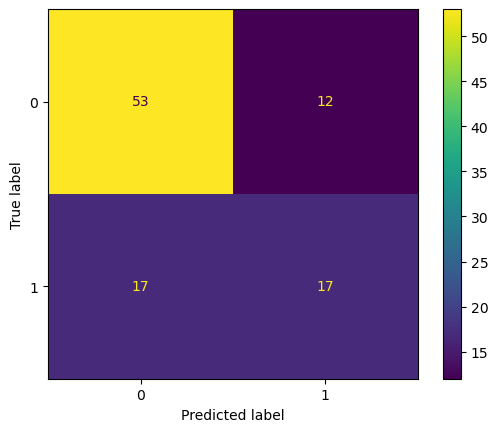

In [8]:
nn_params = {
    'hidden_layer_nodes': 60,
	'hidden_layer_activation': "relu",
	'learning_rate': 0.01
}

nn = tf.keras.models.Sequential([
    tf.keras.layers.Input((50,), name="input"),
    tf.keras.layers.Dense(nn_params['hidden_layer_nodes'], activation=nn_params['hidden_layer_activation']),
    tf.keras.layers.Dense(2,activation='softmax')
])

nn.compile(
    optimizer=tf.keras.optimizers.SGD(nn_params['learning_rate']), 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

nn_score = k_fold_cv_keras(compiled_model=nn, df=df, pca_components=50, show_confusion_matrix=True)
nn_metrics = mean_std_results_k_fold_CV(nn_score)
nn_metrics

In [ ]:
def models_performance_comparison():
    